### DATASET

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset =pd.read_csv(r"C:\Users\aswin v manoharan\Downloads\Wine_clust .csv")
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
dataset.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
dataset.columns


Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

<Axes: xlabel='Alcohol', ylabel='Color_Intensity'>

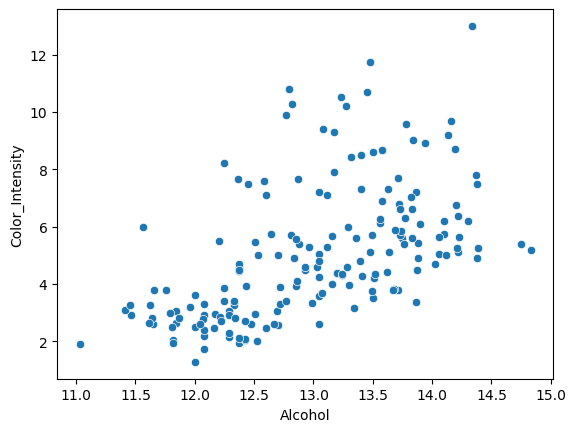

In [11]:
sns.scatterplot(x='Alcohol', y='Color_Intensity',data=dataset)

### kmeans clustering

In [14]:
x= dataset
K=3
kmeans= KMeans(n_clusters=K, random_state=0)
x['Cluster']=kmeans.fit_predict(x[['Alcohol','Color_Intensity']])

C:\Users\aswin v manoharan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aswin v manoharan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
x.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


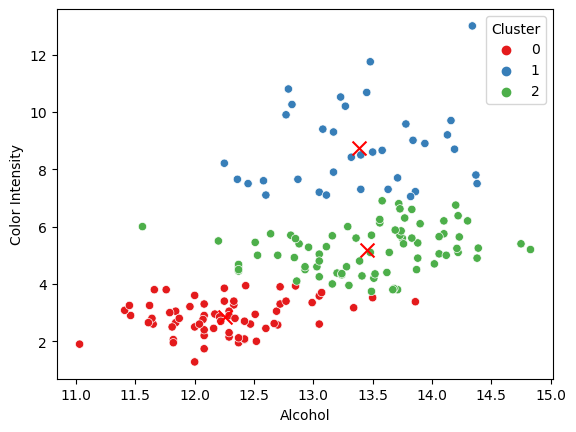

In [16]:
centroids = kmeans.cluster_centers_
sns.scatterplot(data=x, x='Alcohol',y='Color_Intensity',hue="Cluster",palette='Set1')
plt.scatter(centroids[:,0],centroids[:,1],c='red',marker='x', s=100)
plt.xlabel("Alcohol")
plt.ylabel("Color Intensity")
plt.show()

In [17]:
inertia =kmeans.inertia_
print("Inertia:",inertia)
    

Inertia: 203.8193758446264


C:\Users\aswin v manoharan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aswin v manoharan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aswin v manoharan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aswin v manoharan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a

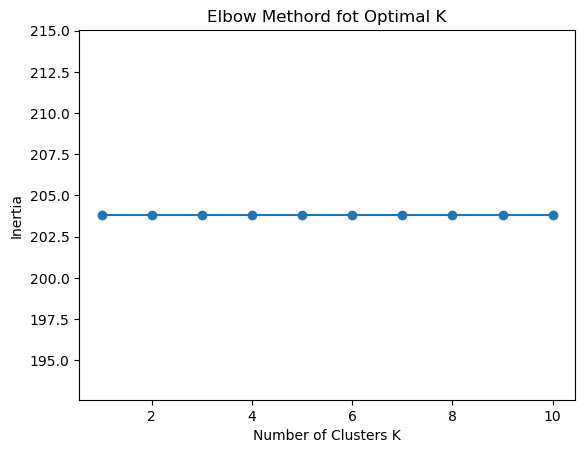

In [21]:
k_range = range(1,11)
inertia_values = []
for k in k_range:
    kmeans= KMeans(n_clusters=K, random_state=0)
    kmeans.fit_predict(x[['Alcohol','Color_Intensity']])
    inertia =kmeans.inertia_
    inertia_values.append(inertia)
plt.plot(k_range, inertia_values,marker='o')
plt.title('Elbow Methord fot Optimal K')
plt.xlabel('Number of Clusters K')
plt.ylabel('Inertia')
plt.show()


In [22]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x[['Alcohol','Color_Intensity']], x['Cluster'])
print(silhouette_avg )

0.5097267872581326


### Agglomerative Hierarchical Clustering

In [23]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt


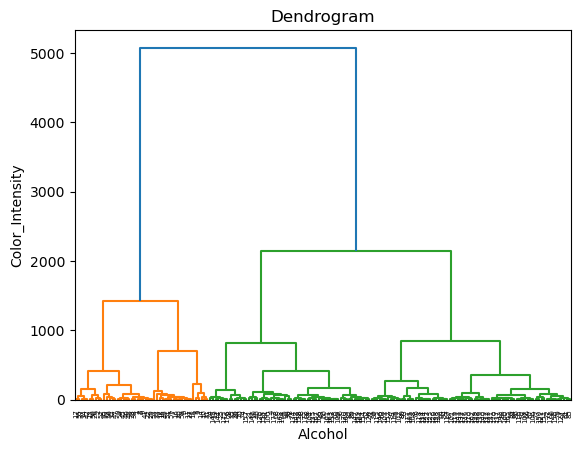

In [24]:
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Alcohol')
plt.ylabel('Color_Intensity')
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
y_hc = hc.fit_predict(x)

C:\Users\aswin v manoharan\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [26]:
y_hc

array([3, 3, 3, 1, 0, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 0, 0, 0,
       3, 3, 0, 0, 3, 1, 0, 3, 1, 1, 3, 1, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0,
       0, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 2, 0, 2, 0, 4, 4, 0,
       2, 2, 0, 0, 0, 4, 2, 3, 0, 4, 4, 2, 0, 2, 4, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 4, 4, 3, 0, 4, 0, 4, 0, 2, 4, 4, 0, 4, 2, 2, 4, 0,
       2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 0, 2, 4, 4, 4, 4, 4, 2, 4, 2, 0, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 4, 0, 0, 2, 2, 2, 4, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2], dtype=int64)

In [27]:
x_np = x.values

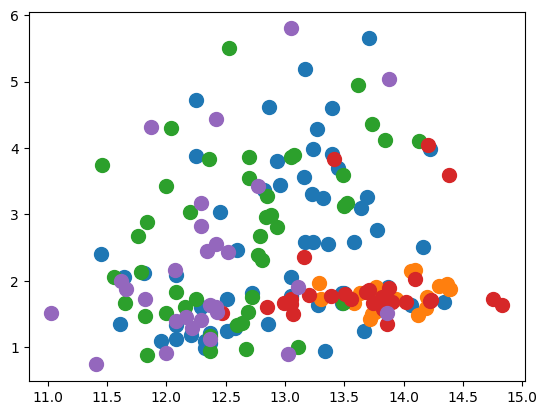

In [28]:
import matplotlib.pyplot as plt
for cluster_label in range(5):
    plt.scatter(x_np[y_hc == cluster_label, 0], x_np[y_hc == cluster_label, 1],s=100,label = f'cluster{cluster_label}')

### DBSCAN Clustering

In [29]:
from sklearn.cluster import DBSCAN

In [31]:
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_model.fit(x)

DBSCAN()

InvalidIndexError: (slice(None, None, None), 0)

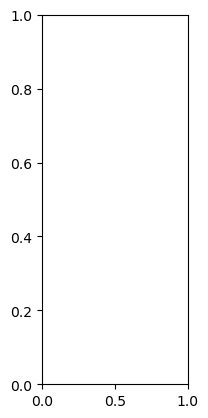

In [35]:
plt.subplot(1, 3, 3)
plt.scatter(x[:, 0], x[:, 1], c=dbscan_model.labels_, cmap='viridis', marker='o')
plt.title('DBSCAN')

plt.show()